In [1]:
# for multiple stocks 
import datetime as dt
import pandas as pd
import yfinance as yf

stocks=["MSFT","INFY.NS","0005.HK"] #0005.HK is HSBC Holdings on HK exchange
today=dt.datetime.today() 
start= today-dt.timedelta(3650) # 10 years

adj_close_prices= pd.DataFrame()
for ticker in stocks:
    adj_close_prices[ticker]=yf.download(tickers=ticker,start=start,end=today)["Adj Close"] #taking only the adjusted close value. 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
nan_counts = adj_close_prices.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

print("Shape = ",adj_close_prices.shape)

Number of NaN values in each column:
MSFT         0
INFY.NS    127
0005.HK    113
dtype: int64
Shape =  (2514, 3)


In [7]:
#dropna
adj_close_prices.dropna(axis=0,inplace=True)
print("Shape = ",adj_close_prices.shape)

Shape =  (2286, 3)


In [13]:
#mean of each stock:
print("Mean of each stock= \n",adj_close_prices.mean())
print("\nSD of each stock= \n",adj_close_prices.std())
print("\nMedian of each stock= \n",adj_close_prices.std())

Mean of each stock= 
 MSFT       157.793858
INFY.NS    847.475217
0005.HK     45.579250
dtype: float64

SD of each stock= 
 MSFT       110.722326
INFY.NS    468.351669
0005.HK      8.800217
dtype: float64

Median of each stock= 
 MSFT       110.722326
INFY.NS    468.351669
0005.HK      8.800217
dtype: float64


In [14]:
adj_close_prices.describe()

,MSFT,INFY.NS,0005.HK
count,2286.000000,2286.000000,2286.000000
mean,157.793858,847.475217,45.579250
std,110.722326,468.351669,8.800217
min,33.838268,291.816101,23.237667
25%,54.775967,440.641617,38.982275
50%,120.544815,637.791412,46.099691
75%,249.792671,1356.982239,52.088446
max,429.369995,1839.635132,70.139999


In [16]:
daily_return=adj_close_prices.pct_change()

In [18]:
print("Mean of each stock= \n",daily_return.mean())
print("\nSD of each stock= \n",daily_return.std())

Mean of each stock= 
 MSFT       0.001252
INFY.NS    0.000840
0005.HK    0.000261
dtype: float64

SD of each stock= 
 MSFT       0.017710
INFY.NS    0.017474
0005.HK    0.014757
dtype: float64


In [20]:
#rolling values
#average return of a stock since past 10 days
#rolling mean benefit, is that it cuts out the noise
#simple moving average:
rolling_mean=daily_return.rolling(window=10).mean()


In [21]:
#Exponentially Weighted Moving Average

daily_return.ewm(com=10).mean()
#min period = 0 by default

,MSFT,INFY.NS,0005.HK
Date,,,
2014-05-19,NaN,NaN,NaN
2014-05-20,-0.001761,0.035538,0.005488
2014-05-21,0.008006,0.022778,-0.002997
2014-05-22,0.002815,0.009449,-0.002354
2014-05-23,0.002150,0.002655,-0.002034
...,...,...,...
2024-05-07,0.000398,-0.000755,0.006736
2024-05-08,0.000628,-0.001548,0.006972
2024-05-09,0.000965,-0.000627,0.003176


# Visualization Basics

In [24]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_10_9_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 5.1 MB/s eta 0:00:00:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.3 MB/s eta 0:00:0000:01:00:01
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_10_9_x86_64.whl (68 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.5 MB/s eta 0:00:00


<Axes: xlabel='Date'>

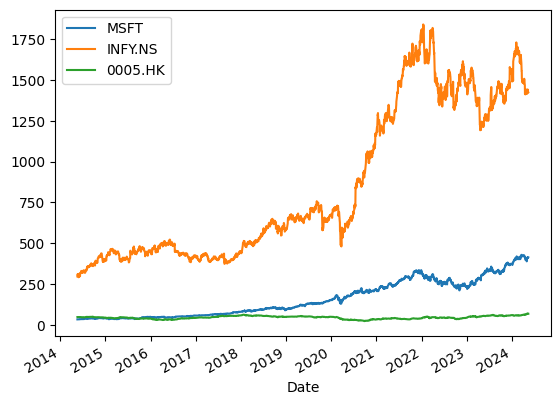

In [25]:
adj_close_prices.plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

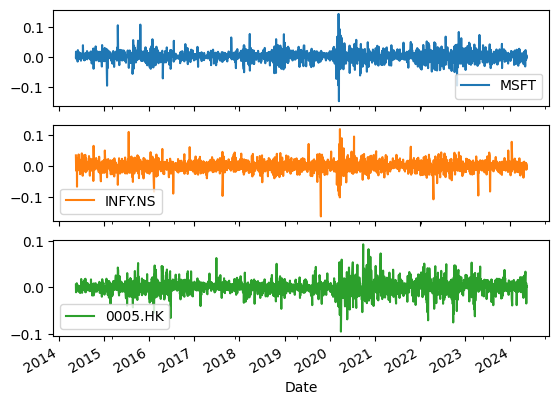

In [27]:
daily_return.plot(subplots=True)

<Axes: xlabel='Date'>

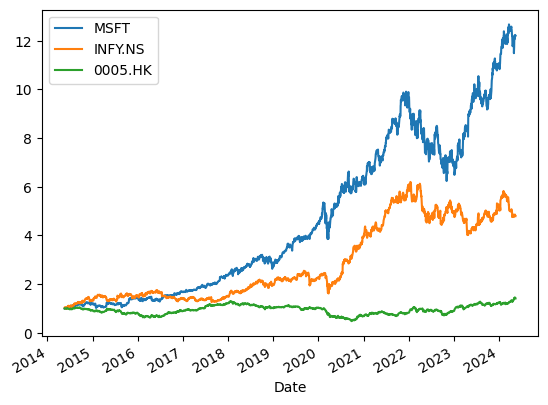

In [30]:
(1+daily_return).cumprod().plot()